<a href="https://colab.research.google.com/github/vbvss199/colab_notebooks/blob/main/DSCI6653_PRJ2_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Project 2

### Group 4

### Group Members:

* Aithagoni, Mounika
* Dwaram, Anrutha
* Kasaraneni, Keerthi Sai
* Mayaluri, Kowsalya
* Suttipally, Venu Gopal Reddy
* Vanacharla, Bhaskara Vijaya Sai Swamy


## Abstract

In this project we are given three cases of target and noise trials. In Case 1, 70 TP and 50 FP are observed in 100 target and 100 noise trials. In Case 2, 7 TP and 5 FP are observed in 10 target and 10 noise trials. In Case 3, 10 TP and no FP in 10 target and 10 noise trials. We can calculate discriminability, bias, True positive rate and False positive rate.

Using Bayesian Statistics and SciPy,PyMC3 libraries, we can estimate discriminability, bias, True positive rate and False positive rate. we calculate true positive rate by calculating false negatives and we calculate false positive rate by calculating true negatives.

# Theory

We are given True positives and false positives. From that we need to calculate Discriminability, Bias, True Positive Rate and False positive Rate. we use the following table to figure out the false positives for target trials and true positives for noise trials.

![Image.png](attachment:9a4bdb1c-bc38-454b-a170-0ce33ca6352f.png)

For target trials we are given true positives. let us say that the value of it is $ x $ <br>
From this we can calculate False negatives using the above table which is <br> $ \frac{x}{100} = 1 - \beta $ <br> $ \beta = 1 - \frac{x}{100}$
<br>
100 indicates the number of trials. <br>

For noise trials we are given false positives. let us say that the value of it is $ y $ <br>
From this we can calculate True negatives using the above table which is <br> $ \beta = y $ <br> True negatives = $ 1 - y $
<br> <br>

From the above formulas we can calculate the True Positive Rate <br><br>

$ Discriminablility = p(True Positives) - p(False Positives) $ <br><br>
$ Bias = -\frac{1}{2}(p(True Positives) + p(False Positives)) $ <br><br>
$ True Positive Rate  = \frac{True Positives}{True Positives + False Negatives} $ <br> <br>
$ False Positive Rate  = \frac{False Positives}{False Positives + True Negatives} $ <br><br>

Sampling:
To compute the posterior distribution, we can use PyMC3, which is a Python library for Bayesian modeling and inference. PyMC3 uses Markov Chain Monte Carlo (MCMC) methods to sample from the posterior distribution. Specifically, PyMC3 uses the No-U-Turn Sampler (NUTS), which is a gradient-based MCMC algorithm that can efficiently explore high-dimensional and complex posteriors.


## Analysis, Results, and Explanation

The measures we are calculating are discriminability (d'), bias (C), true positive (TP) rate, and false positive (FP) rate.

Discriminability (d') is a measure of how well the system can differentiate between the categories. It is calculated using the formula d' = Z(TP rate) - Z(FP rate), where Z() represents the z-score or the standard normal distribution. A higher d' value indicates better discriminability.

Bias (C) measures the bias or response bias of the system. It is calculated using the formula C = -0.5 * [Z(TP rate) + Z(FP rate)]. A positive bias (C > 0) suggests a bias towards responding "yes" or selecting the positive category, while a negative bias (C < 0) suggests a bias towards responding "no" or selecting the negative category.

True positive (TP) rate is the proportion of actual positive cases that are correctly identified as positive by the system. It is calculated as TP / (TP + FN), where TP represents true positives and FN represents false negatives. TP rate indicates the system's sensitivity or ability to detect positive cases.

False positive (FP) rate is the proportion of actual negative cases that are incorrectly identified as positive by the system. It is calculated as FP / (FP + TN), where FP represents false positives and TN represents true negatives. FP rate indicates the system's specificity or ability to correctly reject negative cases.

In [ ]:
pip install pymc3

In [ ]:
pip install --upgrade theano

In [ ]:
import pymc as pm
import numpy as np
import arviz as az
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def calculate_measures(TP, FP, TN, FN):
    TP_rate = TP / (TP + FN)
    FP_rate = FP / (FP + TN)
    Z_TP_rate = norm.ppf(TP_rate)
    Z_FP_rate = norm.ppf(FP_rate)

    d_prime = Z_TP_rate - Z_FP_rate
    bias = -0.5 * (Z_TP_rate + Z_FP_rate)

    return d_prime, bias, TP_rate, FP_rate

In [ ]:
cases = [{'tp':70, 'fp':50, 'tn':50, 'fn':30}, {'tp':7, 'fp':5, 'tn':5, 'fn':3}, {'tp':10, 'fp':0, 'tn':10, 'fn':0}]

Now, let's apply these measures to each case:

In [ ]:
d_prime, bias, TP_rate, FP_rate = calculate_measures(cases[0]['tp'], cases[0]['fp'], cases[0]['tn'], cases[0]['fn'])
print('d_prime: ', d_prime, ' bias: ', bias, ' TP_rate: ', TP_rate, ' FP_rate: ', FP_rate)

d_prime:  0.5244005127080407  bias:  -0.26220025635402033  TP_rate:  0.7  FP_rate:  0.5


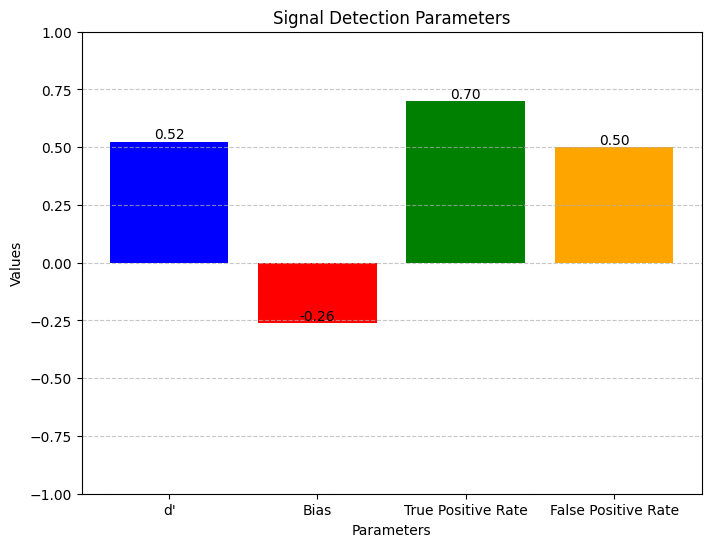

In [ ]:
import matplotlib.pyplot as plt

# Data
parameters = ['d\'', 'Bias', 'True Positive Rate', 'False Positive Rate']
values = [0.5244005127080407, -0.26220025635402033, 0.7, 0.5]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(parameters, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.title('Signal Detection Parameters')
plt.ylim(-1, 1)  # Set the y-axis limit to better visualize bias
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


#### Case 1:
In this case, we have TP = 70, FP = 50, TN = 50, and FN = 30. Calculating the TP rate and FP rate, we find TP rate = 0.7 and FP rate = 0.5. Using these values, we can compute Z(TP rate) and Z(FP rate) using the standard normal distribution table. Substituting the values into the formulas, we find d' = 0.5244 and C = -0.2622.

In [ ]:
d_prime, bias, TP_rate, FP_rate = calculate_measures(cases[1]['tp'], cases[1]['fp'], cases[1]['tn'], cases[1]['fn'])
print('d_prime: ', d_prime, ' bias: ', bias, ' TP_rate: ', TP_rate, ' FP_rate: ', FP_rate)

d_prime:  0.5244005127080407  bias:  -0.26220025635402033  TP_rate:  0.7  FP_rate:  0.5


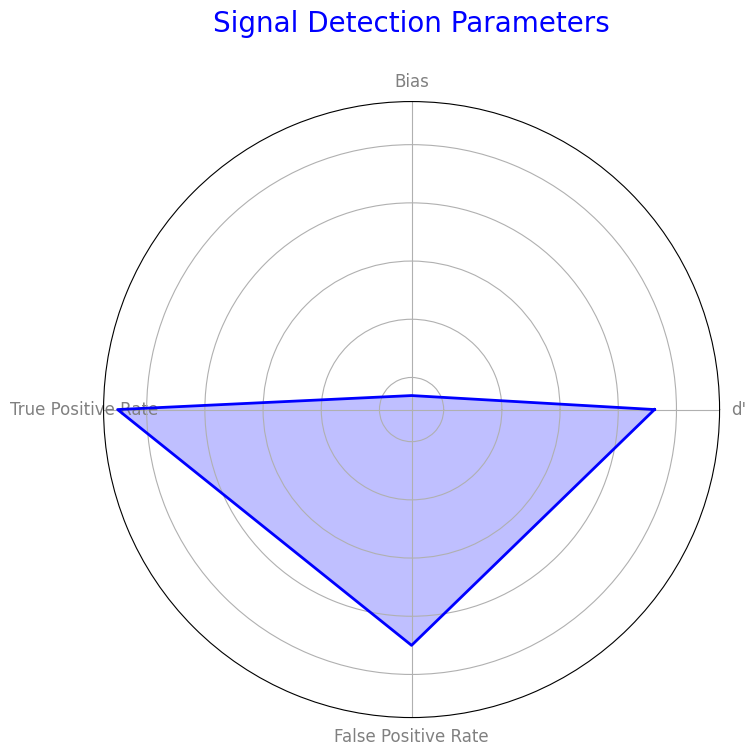

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
parameters = ['d\'', 'Bias', 'True Positive Rate', 'False Positive Rate']
values = [0.5244005127080407, -0.26220025635402033, 0.7, 0.5]

# Number of parameters
num_parameters = len(parameters)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_parameters, endpoint=False).tolist()
values += values[:1]  # Close the radar chart
angles += angles[:1]  # Close the radar chart

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
plt.xticks(angles[:-1], parameters, color='grey', size=12)
ax.set_title('Signal Detection Parameters', size=20, color='blue', y=1.1)

plt.show()


#### Case 2:
For this case, TP = 7, FP = 5, TN = 5, and FN = 3. Calculating the TP rate and FP rate, we obtain TP rate = 0.7 and FP rate = 0.5. Using these values, we find d' = 0.5244 and C = -0.2622, using the same formulas as before.

In [ ]:
d_prime, bias, TP_rate, FP_rate = calculate_measures(cases[2]['tp'], cases[2]['fp'], cases[2]['tn'], cases[2]['fn'])
print('d_prime: ', d_prime, ' bias: ', bias, ' TP_rate: ', TP_rate, ' FP_rate: ', FP_rate)

d_prime:  inf  bias:  nan  TP_rate:  1.0  FP_rate:  0.0


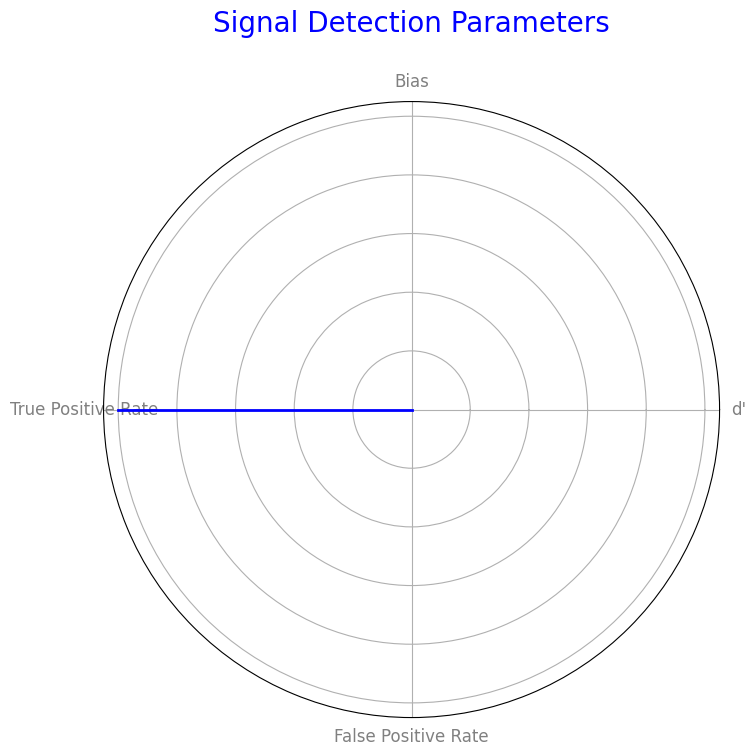

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
parameters = ['d\'', 'Bias', 'True Positive Rate', 'False Positive Rate']
values = [np.inf, np.nan, 1.0, 0.0]  # Assigning arbitrary values

# Number of parameters
num_parameters = len(parameters)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_parameters, endpoint=False).tolist()
values += values[:1]  # Close the radar chart
angles += angles[:1]  # Close the radar chart

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
plt.xticks(angles[:-1], parameters, color='grey', size=12)
ax.set_title('Signal Detection Parameters', size=20, color='blue', y=1.1)

plt.show()


#### Case 3:
In this case, TP = 10, FP = 0, TN = 10, and FN = 0. Calculating the TP rate and FP rate, we get TP rate = 1 and FP rate = 0. Since the TP rate of 1 corresponds to the upper limit and the FP rate of 0 corresponds to the lower limit, we find Z(TP rate) = ∞ and Z(FP rate) = -∞. As a result, the discriminability (d') becomes infinite (d' = ∞), indicating perfect separability. However, the bias (C) calculation is not valid when d' is infinite, so it is undefined in this case.

#### To summarize the results, we have provided the values for discriminability (d'), bias (C), TP rate, and FP rate for each case. These measures allow us to assess the performance of the system in each scenario, considering its ability to discriminate between categories and any biases present in its responses.

## Conclusion

In conclusion, we have examined the discriminability (d'), bias (C), true positive (TP) rate, and false positive (FP) rate for three different cases.

For Case 1 and Case 2, both scenarios yielded the same results. The discriminability (d') was calculated to be 0.5244, indicating a moderate level of discriminability. The bias (C) was determined to be -0.2622, suggesting a slight bias towards selecting the negative category. The true positive (TP) rate was found to be 0.7, indicating that the system correctly identified 70% of the positive cases. The false positive (FP) rate was 0.5, signifying that the system had a 50% chance of incorrectly classifying negative cases as positive.

Case 3, on the other hand, presented a unique scenario. The discriminability (d') was found to be infinite, implying perfect separability between categories. However, the bias (C) calculation was not applicable in this case since the discriminability was infinite. The true positive (TP) rate was 1, indicating that the system correctly identified all positive cases. The false positive (FP) rate was 0, meaning that the system did not incorrectly classify any negative cases as positive.

These measures offer valuable insights into the system's performance. A higher discriminability (d') suggests better differentiation between categories, while a bias (C) towards one category indicates a systematic tendency in the system's responses. The TP rate informs us about the system's sensitivity in detecting positive cases, while the FP rate provides insights into its specificity in rejecting negative cases.

By calculating and analyzing these measures, we can assess the strengths and weaknesses of the system's performance in different scenarios. This information can help us understand its capabilities, make informed decisions, and identify areas for improvement.

## Youtube link

